In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
from PIL import Image
from skimage import io,color
from skimage import transform as tr
import pickle, math, cv2,os
from os import walk
from os.path import join

## Initial Array 

In [2]:
def container_initial(row,col,deepth=1):
    if deepth == 1:
        return np.zeros((row,col),dtype=np.float32) # create empty container to store the input images
    else:
        return np.zeros((row,col,deepth),dtype=np.float32) # create color container

def array2img(img):
    pil_img = Image.fromarray(np.uint8(img))
   # pil_img.show()
    return pil_img

## Input Image

In [3]:
def image_read(container,num,folder='',normalize=True,flatten=False,one_hot=False):
    
    
    if folder !='':
        
        allfile = [] #存取全部檔案的路徑
        
        # 遞迴列出所有檔案的絕對路徑
        for root, dirs, files in walk(folder):
            for f in files:
                fullpath = join(root, f)
                fullpath = fullpath.replace("\\", "//")
                allfile.append(fullpath)
    
    for i in range(num):
        img = io.imread('./'+allfile[i],as_gray=True)
        
        # 如果 尺寸不對 就做調整 
        if img.shape[0] != 32 and img.shape[1] !=32 :
            img=tr.resize(img,[32,32],order=5)
            container[i]=img.flatten()
        else:
            container[i]=img.flatten()
        
    if (normalize == False) and (container.dtype != 'uint8'):
        container=(container).astype(np.uint8)
    else:
        container=container.astype(np.float32)       
        
    ''' qui num-1 ? '''
    if flatten != True :
        container=container.reshape(num,32,32)    
        
    
    ''' _________create label_________ '''
    allabel = os.listdir('./'+mypath) #標籤紀錄
    
    if one_hot == False :
        img_label= []
        for i in range(num):
            img_label.append(allabel.index(allfile[i].split('//')[-2]))   # 把英文變數字
            #img_label[i]= allfile[i].split('//')[-2]
            
    else:
        
        img_label=np.zeros((num,len(allabel)),'uint8')
        for i in range(num):
            img_label[i][allabel.index(allfile[i].split('//')[-2])]=1
    
    return container, img_label

# Create

In [4]:
# 指定要列出所有檔案的目錄
mypath = "Tranum"
allfile = []

# 遞迴列出所有檔案的絕對路徑
for root, dirs, files in walk(mypath):
    for f in files:
        fullpath = join(root, f)
        fullpath = fullpath.replace("\\", "//")
        allfile.append(fullpath)
        #print(fullpath)
#print(allfile[0].split('//')[-2])
print(len(allfile))

35834


In [5]:
# Create
img=container_initial(len(allfile),1024)
img, img_label=image_read(img,len(allfile),folder='Tranum',one_hot=False)

In [6]:
allabel = os.listdir('./'+mypath) #標籤紀錄
print(allabel)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


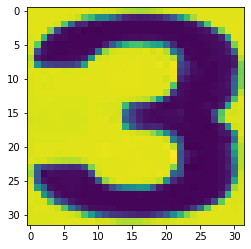

3


In [7]:
#plt.imshow(array2img((img[4000]*255).reshape(32,32)))
plt.imshow(array2img((img[4000]*255))) # No flatten
plt.show()
#print(allabel[np.argmax(img_label[4000])])
print(allabel[img_label[4000]]) # No onehot

##  儲存

In [8]:
if __name__ == "__main__":
    
    with open ('Carplate_dataset_Noflatten35000.pkl', 'wb') as f:
        pickle.dump(img,f,True)
        pickle.dump(img_label,f,True)
        pickle.dump(allabel,f,True)

## 可視化

In [9]:
def show_img(img,star_num = 0, stop_num = 10):
    
    #__________ show gray images ____________

    plt.figure(figsize=[5,5],dpi=100)
    plt.suptitle("display 0-9 image pictures as gray mode")
    
    for i in range(star_num, stop_num):
        plt.subplot(math.ceil((stop_num - star_num)/5),5,i+1-star_num)
        plt.title(str(i)+" image")
        plt.xticks([])
        plt.yticks([])
        
        plt.imshow(array2img((img[i]*255).reshape(32,32)))
    
    plt.show()

__________show the original images__________


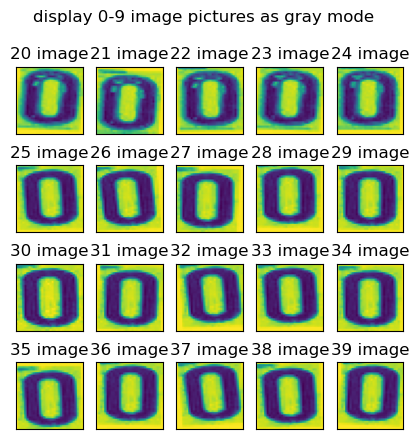

In [10]:
print("__________show the original images__________")
#show_img(img,star_num = 0, stop_num = 20)   # num can enter Quantity 
show_img(img,star_num = 20, stop_num = 40)   # num can enter Quantity 
#show_img(img,star_num = 40, stop_num = 60)   # num can enter Quantity 

__________show the complementary images__________


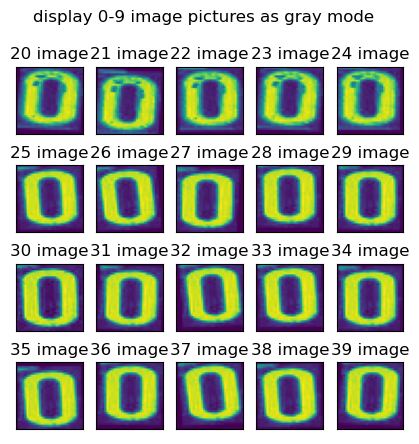

In [11]:
print("__________show the complementary images__________")
#show_img(abs(1-img),star_num = 0, stop_num = 20)    # 黑白 互調 abs( 1 - img )
show_img(abs(1-img),star_num = 20, stop_num = 40)    # 黑白 互調 abs( 1 - img )
#show_img(abs(1-img),star_num = 40, stop_num = 60)    # 黑白 互調 abs( 1 - img )